In [1]:
from baselines.CPCA import cpca
import torch
import numpy as np
from dataset import set_random_seed
from dataset import GraphLevelDataset
from backbone import GCNPredictor
import importlib


def graph_class_increment():
    ### device ###
    cuda_index = 'cuda:' + '0'
    device = torch.device(cuda_index if torch.cuda.is_available() else "cpu")

    ### set seed ###
    set_random_seed()


    model_list = {"bare":"bare","ewc":"ewc","gem":"gem","joint":"joint","lwf":"lwf","mas":"mas","twp":"twp","ergnn":"ergnn"}
    m = "data"

    ### load dataset ###
    frac_list = np.array([0.8,0.0,0.2])
    clss_task_list = [20,5,5,5,5]
    GData = GraphLevelDataset(frac_list,clss_task_list,m)
    dataset, train_set, val_set, test_set = GData.get_dataset()

    batchsize = 64

    model = GCNPredictor(in_feats=dataset.graphs[0].ndata['h'].shape[1], n_tasks=sum(clss_task_list))

    life_model = importlib.import_module(f"baselines.{m}_model")

    ### class-incremnet task ###
    model_CL =  life_model.NET(model, clss_task_list, device)
    model_CL.load_dataset(GData, batchsize = batchsize)

if __name__ == '__main__':
    graph_class_increment()

Processing dgl graphs from scratch...
Processing molecule 1000/3949
Processing molecule 2000/3949
Processing molecule 3000/3949
End Dataset Split!


Processing dgl graphs from scratch...
Processing molecule 1000/3949
Processing molecule 2000/3949
Processing molecule 3000/3949
load saved dataset!!!


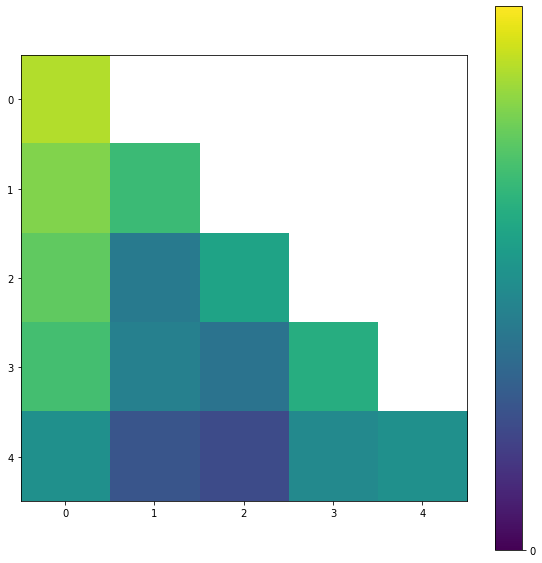

End!  the AP [0.88662131 0.747275   0.58275341 0.53468923 0.39301192] the AF [ 0.         -0.07482993 -0.20024239 -0.21087653 -0.32658173]


In [ ]:
from baselines.CPCA import cpca
import torch
import numpy as np
from dataset import set_random_seed
from dataset import GraphLevelDataset
from backbone import GCNPredictor
import importlib


def graph_class_increment():
    ### device ###
    cuda_index = 'cuda:' + '0'
    device = torch.device(cuda_index if torch.cuda.is_available() else "cpu")

    ### set seed ###
    set_random_seed(0)

    m = "cpca"

    ### load dataset ###
    frac_list = np.array([0.8,0.0,0.2])
    clss_task_list = [20,5,5,5,5]
    GData = GraphLevelDataset(frac_list,clss_task_list,m)
    dataset, train_set, val_set, test_set = GData.get_dataset()

    batchsize = 64
    ### load model ###
    model = GCNPredictor(in_feats=dataset.graphs[0].ndata['h'].shape[1], n_tasks=clss_task_list[0])

    ### class-increment task ###
    CPCA = cpca(model, clss_task_list[0], device)
    CPCA.load_dataset(GData, batchsize=batchsize)
    is_debug = True
    if_eval = True
    for task_id, task_class_num in enumerate(clss_task_list):
        CPCA.load_task_dataset(task_id, task_class=task_class_num)
        CPCA.before_train(task_id)
        CPCA.model_train(task_id, debug = is_debug, if_eval = if_eval, n_epoch=150, use_mu =  False)
        CPCA.after_train(task_id)
        CPCA.cal_feature_class(debug = is_debug)
        CPCA.evaluation(task_id, clss_task_list)
        CPCA.end_task()

if __name__ == '__main__':
    graph_class_increment()